# Performance evaluation


STeven Injety
CPTR Machine Learning

This notebook demonstrates how to compute precision, recall, AUC and PR curves using Scikit-Learn.


# Breast cancer dataset
With this dataset, we will be predicting whether a tumor is MALIGNANT or BENIGN based on attributes of the tumor.

Attributes include:
* radius (mean of distances from center to points on the perimeter) 
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry 
* fractal dimension ("coastline approximation" - 1)

The dataset is included in Scikit-Learn. 

For details, see: 

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [ ]:
from sklearn import datasets

In [ ]:
# import dataset
cancer = datasets.load_breast_cancer()

## What are we working with?
What does the data structure look like?

In [ ]:
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


What do the feature vectors look like?

In [ ]:
print(cancer.data[:5])    # display first 5 feature vectors

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

What are the output classes?

In [ ]:
print(cancer.target_names)  # output label names

['malignant' 'benign']


In [ ]:
print(cancer.target[:500])   # output values for first 500 tumors 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In this dataset MALIGNANT = 0, BENIGN = 1.

What is the class distribution?

In [ ]:
import numpy as np

# count the number of each label
label_counts = np.bincount(cancer.target)
total_counts = cancer.target.shape[0]
for counts, label in zip(label_counts, cancer.target_names):
  print('{0} instances of {1} ({2:.1f}%)'.format(counts, label, 100.0*counts/total_counts))

212 instances of malignant (37.3%)
357 instances of benign (62.7%)


## Split our dataset

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Split the data set into training and testing (80% testing, 20% training).
# Use stratified split to make sure class distribution from train/test is the same.
split = StratifiedShuffleSplit(n_splits=1, train_size=0.8, random_state=3)

for train_index, test_index in split.split(cancer.data, cancer.target):
    print('Training samples: {}, testing samples: {}'
          .format(train_index.shape, test_index.shape))
    
X_train = cancer.data[train_index]
X_test = cancer.data[test_index]

y_train = cancer.target[train_index]
y_test = cancer.target[test_index]

Training samples: (455,), testing samples: (114,)


In [ ]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

label_counts = np.bincount(y_train)
total_counts = y_train.shape[0]
for counts, label in zip(label_counts, cancer.target_names):
  print('{0} training instances of {1} ({2:.1f}%)'.format(counts, label, 100.0*counts/total_counts))

X_train shape: (455, 30)
y_train shape: (455,)
X_test shape: (114, 30)
y_test shape: (114,)
170 training instances of malignant (37.4%)
285 training instances of benign (62.6%)


# Create the logistic regression model
We will use a logistic regression classifier model. However, we could use other models: knn, decision trees, perceptron.

In [ ]:
from sklearn import linear_model

In [ ]:
logit_reg = linear_model.LogisticRegression(max_iter=5000)

# Train the model

In [ ]:
logit_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluate the model

In [ ]:
print("Test set score: {:.2f}".format(logit_reg.score(X_test, y_test)))

Test set score: 0.96


# Predicted probabilities
A logistic regression model outputs the class probability. To classify a sample, a threshold is applied to the output. 

- Output greater than 0.5 is labeled positive (e.g. Malignant). 
- Output less than 0.5 is labeled negative (e.g. Benign)

The `predict` function outputs class labels (using 0.5 as a threshold), not probabilities. 

However, the `predict_proba` function does output probabilities for both classes.

If the classification threshold is increased/decrease from 0.5, this may change the recall/precision tradeoff.

In [ ]:
lr_pred = logit_reg.predict(X_test)

In [ ]:
print(lr_pred[:10])

[0 1 1 1 1 1 1 1 1 0]


In [ ]:
lr_pred_prob = logit_reg.predict_proba(X_test)


In [ ]:
lr_pred_prob[:5]

array([[9.95796681e-01, 4.20331862e-03],
       [9.01587174e-04, 9.99098413e-01],
       [1.16314195e-04, 9.99883686e-01],
       [4.66158576e-05, 9.99953384e-01],
       [4.61342401e-04, 9.99538658e-01]])

In [ ]:
['Malignant prob=%.2f, Benign prob=%.2f' % (lr_pred_prob[i][0], lr_pred_prob[i][1]) for i in range(0,5)]

['Malignant prob=1.00, Benign prob=0.00',
 'Malignant prob=0.00, Benign prob=1.00',
 'Malignant prob=0.00, Benign prob=1.00',
 'Malignant prob=0.00, Benign prob=1.00',
 'Malignant prob=0.00, Benign prob=1.00']

While logistic regression can classify instances based on predicted probability, the implementation of its `decision_function` in Scikit-Learn outputs the *logit* of the probability of the positive class (BENIGN class is the positive class (label=1) in this dataset).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Logit.svg/1280px-Logit.svg.png" width="50%">

By Krishnavedala - Own work, CC0, https://commons.wikimedia.org/w/index.php?curid=21731574

In [ ]:
from scipy.special import logit
print(logit(4.20331862e-03))

-5.467668740679456


In [ ]:
lr_score = logit_reg.decision_function(X_test)

In [ ]:
lr_score[:5]

array([-5.46766874,  7.01045183,  9.05909913,  9.97352317,  7.68090861])

# Handling class imbalance
Scikit-Learn provides functions for calculating recall, precision, F1 score, ROC curve, AUC, and PR curves.

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score

In [ ]:
print('Precision={:.2f}, Recall={:.2f}, F1 score={:.2f}'.format(precision_score(lr_pred, y_test), recall_score(lr_pred, y_test), f1_score(lr_pred, y_test)))

Precision=0.96, Recall=0.97, F1 score=0.97


In [ ]:
from sklearn.metrics import roc_curve, auc, plot_roc_curve, precision_recall_curve

`roc_curve` function calculates true positive and false positive rates for different threshold values applied to the output of `decision_function` (not `predict_proba`). For this reason you will see negative thresholds.

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, lr_score)

In [ ]:
print(fpr)

[0.         0.         0.         0.02380952 0.02380952 0.04761905
 0.04761905 0.11904762 0.11904762 0.14285714 0.14285714 1.        ]


In [ ]:
print(tpr)

[0.         0.01388889 0.86111111 0.86111111 0.93055556 0.93055556
 0.97222222 0.97222222 0.98611111 0.98611111 1.         1.        ]


In [ ]:
print(thresholds)

[ 14.45040056  13.45040056   2.61051898   2.33754927   1.62953876
   1.46485338  -0.16489954  -1.48620543  -2.29614985  -2.87992327
  -3.57927263 -53.73156059]


## Plot ROC curve

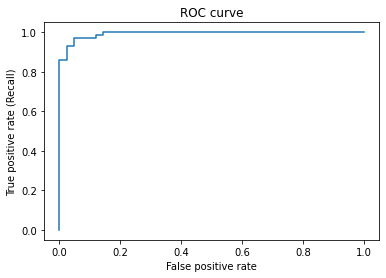

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate (Recall)')
plt.show()

`plot_roc_curve` computes the ROC curve for different thresholds and plots the curve all in one function.

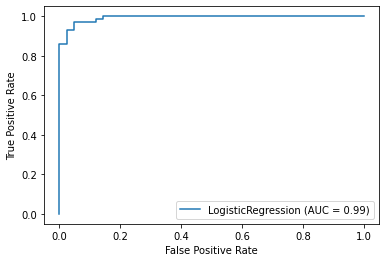

In [ ]:
roc_display = plot_roc_curve(logit_reg, X_test, y_test)

`plot_roc_curve` also computes AUC of the curve. 

If you want the AUC value on its own, you can use the function `AUC`.

In [ ]:
auc(fpr, tpr)

0.9927248677248678

`auc` will compute the area under any curve using the trapezoidal method.

If you don't already have the false positive and true positive rates, you can use `roc_auc_score` to compute the ROC curve and return AUC.

In [ ]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, lr_score))

0.9927248677248678


## Plot PR curve

For datasets with very large class imbalance, a precision recall curve can make it easier to identify which classifier is better.

`precision_recall_curve` will compute precision and recall for different thresholds similar to `roc_curve`.

`plot_precision_recall_curve` will compute and plot the PR curve.

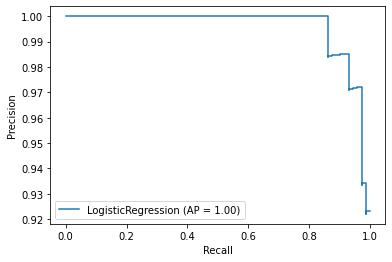

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

pr_display = plot_precision_recall_curve(logit_reg, X_test, y_test)

We can use subplots to display both ROC and PR curves in the same window.

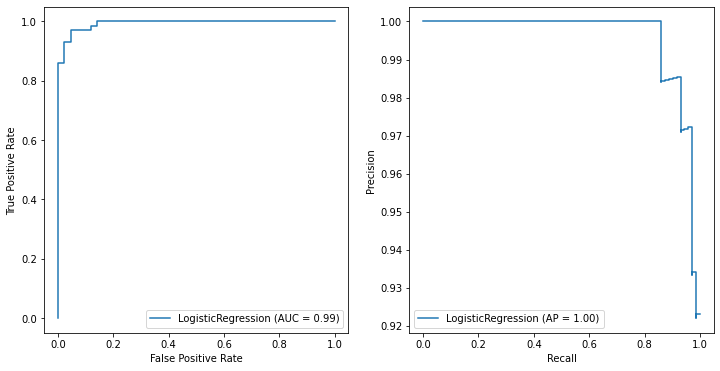

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))

# use our previously computed ROC and PR curves  
# created by plot_roc_curve and plot_precision_recall_curve
roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)

plt.show()

## Plotting ROC and PR curves from multiple models
ROC and PR curves are typically used to compare the performance from multiple models. 

Here we create another classifier model (Support vector machine). Train it on the same training data and plot its ROC and PR curves along with those from our logistic regression model.


In [ ]:
from sklearn import svm

# create model
svm_clf = svm.SVC(kernel='linear') 

# train model
svm_clf.fit(X_train, y_train)       

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

We can tell the `plot_roc_curve` function to use an existing plot window (specified by the `ax` parameter). 

We use the `subplots` function to create an Axes object for the plots.

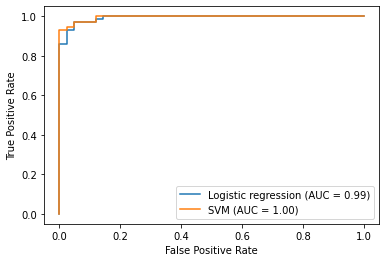

In [ ]:
fig, ax = plt.subplots()
plot_roc_curve(logit_reg, X_test, y_test, name='Logistic regression', ax=ax)
plot_roc_curve(svm_clf, X_test, y_test, name='SVM', ax=ax)

`plot_precision_recall_curve` is similar.

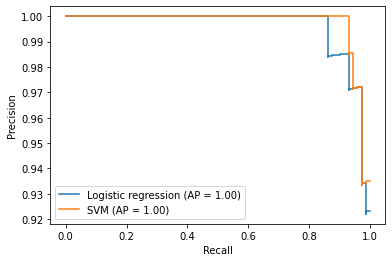

In [ ]:
fig, ax = plt.subplots()
plot_precision_recall_curve(logit_reg, X_test, y_test, name='Logistic regression', ax=ax)
plot_precision_recall_curve(svm_clf, X_test, y_test, name='SVM', ax=ax)

From this, it appears that our SVM classifier is performing slightly better when the threshold is set for high recall. 

The difference is a little more apparent on the PR curve than the ROC curve.

# Confusion matrices
We can compute *confusion matrices* to visualize how our classifier missclassifies each class. This is especially useful when we have more than 2 classes (i.e. multiclass problem).

`confusion_matrix` will calculate the confusion matrix given true and predicted labels.

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lr_pred)

In [ ]:
print(cm)

[[40  2]
 [ 3 69]]


`plot_confusion_matrix` creates a nice visualization of the confusion matrix.

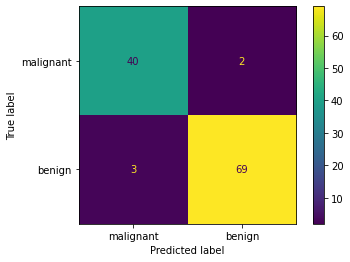

In [ ]:
from sklearn.metrics import plot_confusion_matrix

cm_display = plot_confusion_matrix(logit_reg, X_test, y_test, 
                                   display_labels=cancer.target_names)

# (30 pts) Lab activity 07 - Compute PRF, ROC, AUC, Confusion matrix using KNN (Due Mon, Oct 5 by 11:59 PM)
Apply KNN to the cancer dataset. 

Compute:
 - Recall, Precision, F1-score
 - ROC curve
 - PR curve
 - Confusion matrix

Compare results with logistic regression.



## (1) Create KNN model
Use a KNN model with k=5.

## (2) Train model

## (3) Evaluate performance

What is the recall, precision and f1-score for the test set?

Plot the ROC and PR curves

Display the confusion matrix

## (4) Compare K=1, 3, 5
Train KNN models for k=1 and k=3.


Create models for k=1 and k=3

Train models for k=1 and k=3

Plot ROC curves for each KNN model (k=1, 3, 5) on the same plot.

(Your plot will have three curves on it.) 


Plot PR curves for each KNN model (k=1, 3, 5) on the same plot.

(Your plot will have three curves on it.) 

1. Is there a clear winner? 
2. Is there a model that is clearly the worst?



# (10 pts) Participation quiz - Performance evaluation

Answer the following questions for participation credit for today's class.

## (1) What is one thing that you learned in class today?

## (2) What is one question that you have related to today's class?

## (3) Comparing classifiers 
Suppose a dataset (the ***test set***) has 20 MALIGNANT tumors and 5000 BENIGN tumors (5020 instances total in test set).
- KNN has 200 ***false positives***, 18 ***true positives***.
- SVM has 2 ***false positives***, 7 ***true positives***.



What is the ***Recall*** (TPR) for both classifiers? 

What is the ***False positive rate*** for both classifiers?

What is the ***Precision*** for both classifiers?

How do the two algorithms compare on this dataset? 

If you want to catch more cancerous cases, which is more effective? 




If this classifier is used for screening people in real life, what could be a problem with this choice?